In [1]:
import tweepy                            #conda install -c conda-forge tweepy
from tweepy.auth import OAuthHandler

In [2]:
'''consumer_key = 'Kch3W6I0JK4tG9nsduCTmlQjT'

consumer_secret = 'g5Mq85JSoUt5yp8QeJEmpyy0Ddk49W9RQdga4udhaim5ALi86s'

access_token = '1568507854117826562-doozVMkmBxis0Qe6qlWfBOLW2MiC5w'

access_token_secret = 'nZxHS4ZswYybTZ2BYg41ehfpGMDepxIq5mJnBkGyh3rwH'
'''
consumer_key='Zdx113QZkiNbqOJVAri5oQeSK'
consumer_secret='lurcv44AoZYFGLAPRGnirToq0rUEaVsTYwGpglpR96hvEtvx4Y'
access_token='1568922209846202368-36wFSJs9jxfyx4cHkqjTzilPQ9QX5G'
access_token_secret='JOrbqUaGTbAVqsuZza63iFKz64OuVguXNaiB25I3fmGob'

try:
    auth=OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_token_secret)
    api=tweepy.API(auth)
except:
    print("Failed__! Bad__Luck_!")

In [3]:
posts=api.user_timeline(screen_name='Billgates',count=100,lang ="en",tweet_mode='extended')

i=1
print("TEXT : \n")
print("---------------------------------------------------------------------------------------------")
for tweet in posts:
    print(str(i) + ')' +tweet.full_text+'\n')
    i=i+1
print("---------------------------------------------------------------------------------------------")
print("SUCCESS")

          

Unexpected parameter: lang


TEXT : 

---------------------------------------------------------------------------------------------
1)Math shouldn’t be a gatekeeper, limiting a student’s dreams. It should be a gateway, helping students realize them. https://t.co/YjFMqGn5yz

2)TerraPower, the next-gen nuclear company I founded, just agreed with PacifiCorp to study the feasibility of building five Natrium reactors for its customers. https://t.co/S6F0ALOnFO

3)I had a great meeting with @starkwatzinger to discuss the importance of funding research to address some of the future challenges we face in global health. https://t.co/vLDqt4SBpn

4)Thank you, Prime Minister @Xavier_Bettel for your continued commitment and support. https://t.co/AyXnm7ThA6

5)I am thrilled to see the existing partnership between @EIB and @Breakthrough strengthen with the signing of this MOU today. Global collaboration like this has the power to bring the clean energy solutions we need to communities around the world. https://t.co/YIzvV6G7Jg

6)

In [8]:
print("Show the 5 recent tweet:\n")
print("------------------------------------------------------------------------")
i=1
for tweet in posts[:5]:
    print(str(i) + ') ' +tweet.full_text + '\n')
    i=i+1

Show the 5 recent tweet:

------------------------------------------------------------------------
1) The @Breakthrough Energy Summit is officially a wrap. Reaching net-zero emissions will be the hardest thing humanity has ever done – but I’m leaving today with an increased sense of hope. https://t.co/7zxKbypNOS

2) Literally. https://t.co/vorXxKoMlM

3) Today was pretty special. I was able to get hands on with innovative climate tech that could help us reach net-zero. https://t.co/2yb7WylIH4

4) The Five Grand Challenges can help us consider more ways to develop comprehensive solutions and reduce global emissions. Thank you, Project Art Collective, for your creativity in bringing them to life. https://t.co/XEoMcTcds8

5) This is the “FOCUS” art installation on display at BE Summit. It cleverly represents the Five Grand Challenges — Electricity, Manufacturing, Agriculture, Transportation, and Buildings. https://t.co/34vCLetEdD



In [9]:
from nltk.classify import NaiveBayesClassifier
def WordsFeat(words):
    return dict([(words,True) for word in words])
positive_vocab=['awesome','outstanding','fantastic','terrific','nice','smile','soulful','generous']
negative_vocab=['bad','terrible','hate','damage','evil','flop','boring']

positive=[(WordsFeat(pos),'pos') for pos in positive_vocab]
negative=[(WordsFeat(neg),'neg') for neg in negative_vocab]
train_set=negative+positive
classifier=NaiveBayesClassifier.train(train_set)
pos=0
neg=0
for word in tweet.full_text:
    ClassResult=classifier.classify(WordsFeat(word))
    if ClassResult=='neg':
        neg+=1
    if ClassResult=='pos':
        pos+=1
    
print("Total positive tweets: ",pos)
print("Total negative tweets: ",neg)
print("Positive: ",float(pos)/len(tweet.full_text))
print("Negative: ",float(neg)/len(tweet.full_text))

Total positive tweets:  208
Total negative tweets:  0
Positive:  1.0
Negative:  0.0


In [10]:
import pandas as pd
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,The @Breakthrough Energy Summit is officially ...
1,Literally. https://t.co/vorXxKoMlM
2,Today was pretty special. I was able to get ha...
3,The Five Grand Challenges can help us consider...
4,This is the “FOCUS” art installation on displa...
...,...
95,This $369 billion investment will spark innova...
96,The Inflation Reduction Act’s passage through ...
97,"In the past decade, @OERProject has reached mo..."
98,Prime Minister Shinzo Abe understood that impr...


In [11]:
#Creating a function to clean tweet_data
import re
def CleanText(text):
    text=re.sub('@[A-Za-z0-9]+','',text)  #Removing unnecessary text
    text=re.sub('#', '',text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '',text)#Removing RT
    text=re.sub('https?:\/\/\S+', '',text)     #Removing hyperlink
    return text

#Cleen tweets
df['Tweets']=df['Tweets'].apply(CleanText)
df

,Tweets
0,The Energy Summit is officially a wrap. Reach...
1,Literally.
2,Today was pretty special. I was able to get ha...
3,The Five Grand Challenges can help us consider...
4,This is the “FOCUS” art installation on displa...
...,...
95,This $369 billion investment will spark innova...
96,The Inflation Reduction Act’s passage through ...
97,"In the past decade, has reached more than 1 m..."
98,Prime Minister Shinzo Abe understood that impr...


# Using textblob

In [10]:
# Create function to get subjectivity

from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [11]:
# adding subjectivity and polarity column in dataframe
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Congratulations on a phenomenal career. Time t...,0.500000,0.625000
1,You've been an incredible friend to me and an ...,0.658333,0.372619
2,New ways to prevent and treat malaria are with...,0.495130,0.211039
3,Providing aid to hungry communities is essenti...,0.500000,0.000000
4,Economic inequality is one of the biggest barr...,0.616667,0.183333
...,...,...,...
95,. is one of my favorite storytellers. I was wo...,1.000000,0.500000
96,“It’s also a reminder that it’s not just about...,0.500000,0.000000
97,I got to join the team to talk about the incr...,0.719048,0.361905
98,Today’s ruling makes it more challenging for t...,0.740000,0.453333


In [12]:
# Create function to compute type of tweet
def getAnalysis(score):
    if score<0:
        return 'NEGATIVE'
    elif score==0:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

# adding analysis column to get type of tweet
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Congratulations on a phenomenal career. Time t...,0.500000,0.625000,POSITIVE
1,You've been an incredible friend to me and an ...,0.658333,0.372619,POSITIVE
2,New ways to prevent and treat malaria are with...,0.495130,0.211039,POSITIVE
3,Providing aid to hungry communities is essenti...,0.500000,0.000000,NEUTRAL
4,Economic inequality is one of the biggest barr...,0.616667,0.183333,POSITIVE
...,...,...,...,...
95,. is one of my favorite storytellers. I was wo...,1.000000,0.500000,POSITIVE
96,“It’s also a reminder that it’s not just about...,0.500000,0.000000,NEUTRAL
97,I got to join the team to talk about the incr...,0.719048,0.361905,POSITIVE
98,Today’s ruling makes it more challenging for t...,0.740000,0.453333,POSITIVE


In [13]:
# Printing positive tweets from 100 fetched tweets
print("POSITIVE TWEETS: ")
print("----------------------------------------------------------------------------------------------------------------")
j=1
sortedDF=df.sort_values(by=['Polarity'])        #Sort the tweets
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='POSITIVE':
        print(str(j) +') ' + sortedDF['Tweets'][i])
        print()
        j=j+1

POSITIVE TWEETS: 
----------------------------------------------------------------------------------------------------------------
1) Congratulations on a phenomenal career. Time to celebrate! 

2) You've been an incredible friend to me and an inspiration to an entire generation of tennis players. I'm lucky to have seen you work your magic on the court many times. And I'm excited to watch your philanthropic work grow in this next phase of your life. 

3) New ways to prevent and treat malaria are within reach. They’ll make it possible—with the right funding and commitment—to end malaria. 

4) Economic inequality is one of the biggest barriers to gender equality. True equality depends not only on a woman’s ability to access money, but also on her ability to fully control it. 

5) Seven years ago, world leaders agreed to 17 ambitious goals to reduce inequality by 2030. The 2022 Goalkeepers report is an essential update on the progress. Goalkeepers2030 

6) Which crop that is highly sensit

In [14]:
# Printing positive tweets from 100 fetched tweets
print("NEGATIVE TWEETS: ")
print("----------------------------------------------------------------------------------------------------------------")
j=1
sortedDF=df.sort_values(by=['Polarity'])        #Sort the tweets
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='NEGATIVE':
        print(str(j) +') '+ sortedDF['Tweets'][i])
        print()
        j=j+1

NEGATIVE TWEETS: 
----------------------------------------------------------------------------------------------------------------
1) I feel honored to have met HM Queen Elizabeth, and I am very sad to hear of her passing. My deepest condolences to the Royal Family and the British people. 

2) Summer’s almost over. If you have time to sneak  in another book or two – here are a few I recommend. 

3) In the past 16 years the world has made immense strides in protecting children from life-threatening diarrhea. Today, I congratulate Nigeria on introducing this vaccine, which will protect generations of Nigerian children. 

4) Years ago, the idea of using mosquitoes as an ally in the fight against diseases sounded crazy. But as  of  explains, this innovative solution has already saved lives around the world. 

5) I am honored to receive this award. Thank you, Foreign Minister Hayashi. 

6) Inside a two-story brick building in Medellín, Colombia, scientists work long hours in muggy labs bree

In [15]:
# Printing positive tweets from 100 fetched tweets
print("NEUTRAL TWEETS: ")
print("----------------------------------------------------------------------------------------------------------------")
j=1
sortedDF=df.sort_values(by=['Polarity'])        #Sort the tweets
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='NEUTRAL':
        print(str(j) +')' + sortedDF['Tweets'][i])
        print()
        j=j+1

NEUTRAL TWEETS: 
----------------------------------------------------------------------------------------------------------------
1)Providing aid to hungry communities is essential—but it’s not enough to end food insecurity. We also need innovation to create self-sustaining food systems. 

2)hint: it has the juice

3)Pneumonia is the leading cause of death in children under 5. Inventprise is working to change that:  

4)Germany is a leading voice in the fight against HIV, TB, and malaria. Once again, they're stepping up by increasing their pledge to the . Germany's commitment to the FightForWhatCounts will help save millions of lives. 

5)This is the toughest question I’ve ever had to answer:  

6)This Nerd(le)’s day was just made. 

7)Here’s how I’ve started every day since February. Wordle  

8)Thank you, President Yoon, for your leadership in global health. I look forward to our continued partnership to reduce the burden of disease. 

9)It's here:  

10)We cannot look away from the 

# Plotting Graph

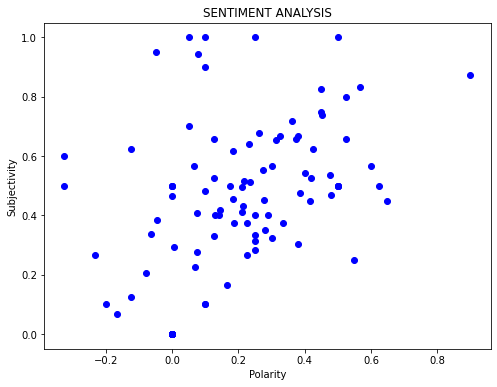

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    
plt.title("SENTIMENT ANALYSIS")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
ptweets=df[df.Analysis=='POSITIVE']
ptweets

,Tweets,Subjectivity,Polarity,Analysis
0,Congratulations on a phenomenal career. Time t...,0.500000,0.625000,POSITIVE
1,You've been an incredible friend to me and an ...,0.658333,0.372619,POSITIVE
2,New ways to prevent and treat malaria are with...,0.495130,0.211039,POSITIVE
4,Economic inequality is one of the biggest barr...,0.616667,0.183333,POSITIVE
5,"Seven years ago, world leaders agreed to 17 am...",0.525000,0.125000,POSITIVE
...,...,...,...,...
94,"Happy 10th birthday to CRISPR, one of the most...",0.833333,0.566667,POSITIVE
95,. is one of my favorite storytellers. I was wo...,1.000000,0.500000,POSITIVE
97,I got to join the team to talk about the incr...,0.719048,0.361905,POSITIVE
98,Today’s ruling makes it more challenging for t...,0.740000,0.453333,POSITIVE


In [18]:
len(ptweets)


74

In [19]:
neutweets=df[df.Analysis=='NEUTRAL']
neutweets

,Tweets,Subjectivity,Polarity,Analysis
3,Providing aid to hungry communities is essenti...,0.500000,0.0,NEUTRAL
6,hint: it has the juice,0.000000,0.0,NEUTRAL
11,Pneumonia is the leading cause of death in chi...,0.000000,0.0,NEUTRAL
13,Germany is a leading voice in the fight agains...,0.000000,0.0,NEUTRAL
15,This is the toughest question I’ve ever had to...,0.000000,0.0,NEUTRAL
17,This Nerd(le)’s day was just made.,0.000000,0.0,NEUTRAL
20,Here’s how I’ve started every day since Februa...,0.000000,0.0,NEUTRAL
40,"Thank you, President Yoon, for your leadership...",0.000000,0.0,NEUTRAL
42,It's here:,0.000000,0.0,NEUTRAL
57,We cannot look away from the impact climate ch...,0.500000,0.0,NEUTRAL


In [20]:
len(neutweets)

15

In [21]:
ntweets=df[df.Analysis=='NEGATIVE']
ntweets

,Tweets,Subjectivity,Polarity,Analysis
12,"I feel honored to have met HM Queen Elizabeth,...",0.500000,-0.325000,NEGATIVE
22,Summer’s almost over. If you have time to snea...,0.100000,-0.200000,NEGATIVE
30,In the past 16 years the world has made immens...,0.625000,-0.125000,NEGATIVE
32,"Years ago, the idea of using mosquitoes as an ...",0.950000,-0.050000,NEGATIVE
34,"I am honored to receive this award. Thank you,...",0.125000,-0.125000,NEGATIVE
37,"Inside a two-story brick building in Medellín,...",0.600000,-0.325000,NEGATIVE
45,This $369 billion investment will spark innova...,0.383333,-0.044444,NEGATIVE
50,"“Outbreaks are inevitable, but pandemics are o...",0.337500,-0.062500,NEGATIVE
80,If we had stopped the COVID pandemic in less t...,0.066667,-0.166667,NEGATIVE
82,"As I look to the future, I plan to give virtua...",0.206944,-0.077778,NEGATIVE


In [22]:
len(ntweets)

11

# PERCENTAGE OF EACH TYPE OF TWEETS

In [23]:
print('% of POSITIVE TWEETS: ',len(ptweets)*100/len(df), '%')
print('% of NEGATIVE TWEETS: ',len(ntweets)*100/len(df), '%')
print('% of NEUTRAL TWEETS: ',len(neutweets)*100/len(df), '%')

% of POSITIVE TWEETS:  74.0 %
% of NEGATIVE TWEETS:  11.0 %
% of NEUTRAL TWEETS:  15.0 %


# PLOTTING BAR GRAPH USING MATPLOTLIB

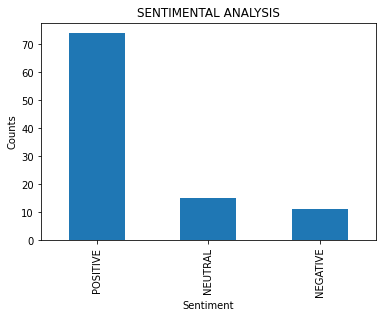

In [24]:
import matplotlib.pyplot as plt
df['Analysis'].value_counts()
plt.title('SENTIMENTAL ANALYSIS')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()